## Set-up

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.1 MB/s eta 0:00:00


In [ ]:
!pip install -q datasets seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.8 MB/s eta 0:00:00


In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from datasets import load_dataset

dataset = load_dataset("darentang/sroie")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 626
    })
    test: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 347
    })
})

In [ ]:
dataset['train'].features

{'id': Value(dtype='string', id=None),
 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-COMPANY', 'I-COMPANY', 'B-DATE', 'I-DATE', 'B-ADDRESS', 'I-ADDRESS', 'B-TOTAL', 'I-TOTAL'], id=None), length=-1, id=None),
 'image_path': Value(dtype='string', id=None)}

(1000, 1000, 3)


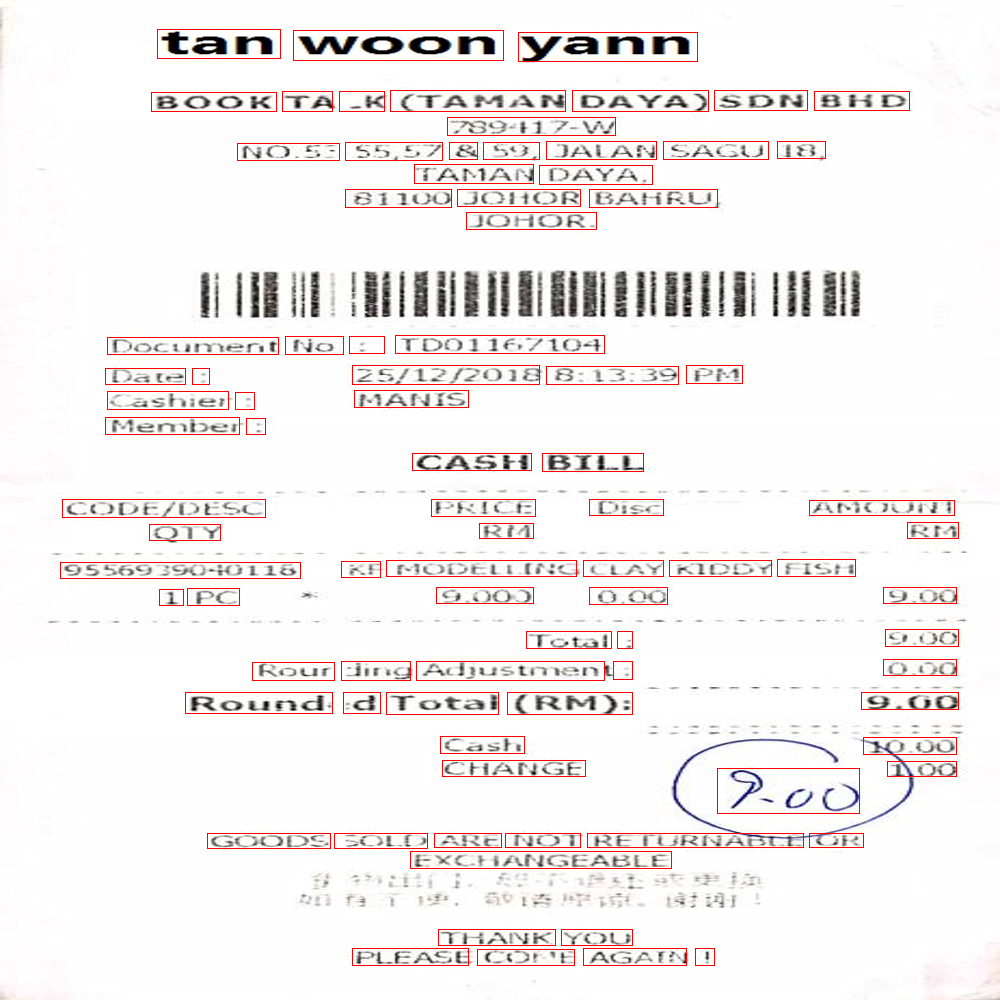

In [ ]:
from PIL import Image, ImageDraw
import numpy as np

example = dataset["train"][0]
image = Image.open(example["image_path"]).resize((1000, 1000))

image_np = np.asarray(image)
print(image_np.shape)

image_draw = ImageDraw.Draw(image)
for box in example['bboxes']:
  image_draw.rectangle([box[0], box[1], box[2], box[3]], outline='red')

image

In [ ]:
words, boxes, ner_tags = example["words"], example["bboxes"], example["ner_tags"]
print(words)
print(boxes)
print(ner_tags)

['tan', 'woon', 'yann', 'BOOK', 'TA', '_K', '(TAMAN', 'DAYA)', 'SDN', 'BHD', '789417-W', 'NO.5:', '55,57', '&', '59,', 'JALAN', 'SAGU', '18,', 'TAMAN', 'DAYA,', '81100', 'JOHOR', 'BAHRU', 'JOHOR.', 'Document', 'No', ':', 'TD01167104', 'Date', ':', '25/12/2018', '8:13:39', 'PM', 'Cashier', ':', 'MANIS', 'Member', ':', 'CASH', 'BILL', 'CODE/DESC', 'PRICE', 'Disc', 'AMOUNT', 'QTY', 'RM', 'RM', '9556939040118', 'KF', 'MODELLING', 'CLAY', 'KIDDY', 'FISH', '1', 'PC', '9.000', '0,00', '9,00', 'Total', ':', '9.00', 'Rour', 'ding', 'Adjustment', ':', '0,00', 'Round', 'd', 'Total', '(RM):', '9.00', 'Cash', '10.00', 'CHANGE', '1.00', '9:00', 'GOODS', 'SOLD', 'ARE', 'NOT', 'RETURNABLE', 'OR', 'EXCHANGEABLE', 'THANK', 'YOU', 'PLEASE', 'COME', 'AGAIN', '!']
[[157, 29, 280, 58], [293, 30, 503, 60], [518, 32, 697, 61], [151, 92, 276, 111], [282, 91, 332, 111], [339, 91, 384, 111], [390, 90, 565, 111], [572, 90, 708, 111], [714, 90, 807, 110], [814, 91, 909, 110], [447, 117, 615, 135], [237, 143, 339, 

## Prepare dataset

In [ ]:
from transformers import AutoProcessor

# we'll use the Auto API here - it will load LayoutLMv3Processor behind the scenes,
# based on the checkpoint we provide from the hub
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

Loading the tokenizer from the `special_tokens_map.json` and the `added_tokens.json` will be removed in `transformers 5`,  it is kept for forward compatibility, but it is recommended to update your `tokenizer_config.json` by uploading it again. You will see the new `added_tokens_decoder` attribute that will store the relevant information.


In [ ]:
from datasets.features import ClassLabel

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image_path"
text_column_name = "words"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

def get_label_list(labels):
    unique_labels = set()
    for label in labels:
        unique_labels = unique_labels | set(label)
    label_list = list(unique_labels)
    label_list.sort()
    return label_list

if isinstance(features[label_column_name].feature, ClassLabel):
    label_list = features[label_column_name].feature.names
    # No need to convert the labels since they are already ints.
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
else:
    label_list = get_label_list(dataset["train"][label_column_name])
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
num_labels = len(label_list)

In [ ]:
print(label_list)

['O', 'B-COMPANY', 'I-COMPANY', 'B-DATE', 'I-DATE', 'B-ADDRESS', 'I-ADDRESS', 'B-TOTAL', 'I-TOTAL']


In [ ]:
print(id2label)

{0: 'O', 1: 'B-COMPANY', 2: 'I-COMPANY', 3: 'B-DATE', 4: 'I-DATE', 5: 'B-ADDRESS', 6: 'I-ADDRESS', 7: 'B-TOTAL', 8: 'I-TOTAL'}


In [ ]:
import numpy as np

def convert_paths_to_numpy(image_paths):
  np_images_list = []
  for path in image_paths:
      image_array = np.asarray(Image.open(path))

      # adding third dimenstion for grayscale images
      if len(image_array.shape) != 3:
        image_array = np.dstack((image_array, image_array, image_array))

      np_images_list.append(image_array)

  return np_images_list

def prepare_examples(examples):
  images = convert_paths_to_numpy(examples[image_column_name])
  words = examples[text_column_name]
  boxes = examples[boxes_column_name]
  word_labels = examples[label_column_name]

  encoding = processor(images, words, boxes=boxes, word_labels=word_labels,
                       truncation=True, padding="max_length")

  return encoding

In [ ]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

features = Features({
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(feature=Value(dtype='int64')),
})

train_dataset = dataset["train"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)
eval_dataset = dataset["test"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)

Map:   0%|          | 0/626 [00:00<?, ? examples/s]

Map:   0%|          | 0/347 [00:00<?, ? examples/s]

In [ ]:
train_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 626
})

In [ ]:
example = train_dataset[0]
processor.tokenizer.decode(example["input_ids"])

'<s> tan woon yann BOOK TA _K (TAMAN DAYA) SDN BHD 789417-W NO.5: 55,57 & 59, JALAN SAGU 18, TAMAN DAYA, 81100 JOHOR BAHRU JOHOR. Document No : TD01167104 Date : 25/12/2018 8:13:39 PM Cashier : MANIS Member : CASH BILL CODE/DESC PRICE Disc AMOUNT QTY RM RM 9556939040118 KF MODELLING CLAY KIDDY FISH 1 PC 9.000 0,00 9,00 Total : 9.00 Rour ding Adjustment : 0,00 Round d Total (RM): 9.00 Cash 10.00 CHANGE 1.00 9:00 GOODS SOLD ARE NOT RETURNABLE OR EXCHANGEABLE THANK YOU PLEASE COME AGAIN!</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><p

In [ ]:
train_dataset.set_format("torch")

Verifying that everything was created properly

In [ ]:
import torch

example = train_dataset[0]
for k,v in example.items():
    print(k,v.shape)

pixel_values torch.Size([3, 224, 224])
input_ids torch.Size([512])
attention_mask torch.Size([512])
bbox torch.Size([512, 4])
labels torch.Size([512])


In [ ]:
eval_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 347
})

In [ ]:
processor.tokenizer.decode(eval_dataset[0]["input_ids"])

'<s> tan chay yee *** COPY *** OJC MARKETING SDN BHD ROC NO: 538358-H NO 2 & 4, JALAN BAYU 4, BANDAR SERI ALAM, 81750 MASAI, JOHOR Tel:07-388 2218 Fax:07-388 8218 Email: ng@ojcgroup.com TAX INVOICE Invoice No : PEGIV-1030765 Date : 15/01/2019 11:05:16 AM Cashier : NG CHUAN MIN Sales Persor : FATIN Bill To : THE PEAK QUARRY WORKS Address Description Qty Price Amount 000000111 1 193.00 193.00 SR KINGS SAFETY SHOES KWD 805 Qty: 1 Total Exclude GST: 193.00 Total GST @6%: 0.00 Total Inclusive GST: 193.00 Round Amt: 0.00 TOTAL: 193.00 VISA CARD 193,00 xxxxxxxxxxxxxxxx4318 Approval Code:000 93.00 Goods Sold Are Not Returnable & Refundable **** Thank You. Please Come Again.****</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pa

In [ ]:
for id, label in zip(train_dataset[0]["input_ids"], train_dataset[0]["labels"]):
  print(processor.tokenizer.decode([id]), label.item())

<s> -100
 tan 0
 w 0
oon -100
 y 0
ann -100
 BOOK 1
 TA 2
 _ 2
K -100
 ( 2
T -100
AM -100
AN -100
 DAY 2
A -100
) -100
 SD 2
N -100
 B 2
HD -100
 7 5
89 -100
417 -100
- -100
W -100
 NO 6
. -100
5 -100
: -100
 55 6
, -100
57 -100
 & 6
 59 6
, -100
 J 6
AL -100
AN -100
 S 6
AG -100
U -100
 18 6
, -100
 TAM 6
AN -100
 DAY 6
A -100
, -100
 8 6
1100 -100
 J 6
OH -100
OR -100
 BA 6
HR -100
U -100
 J 6
OH -100
OR -100
. -100
 Document 0
 No 0
 : 0
 TD 0
01 -100
167 -100
104 -100
 Date 0
 : 0
 25 3
/ -100
12 -100
/ -100
2018 -100
 8 0
: -100
13 -100
: -100
39 -100
 PM 0
 Cash 0
ier -100
 : 0
 MAN 0
IS -100
 Member 0
 : 0
 C 0
ASH -100
 B 0
ILL -100
 CODE 0
/ -100
DES -100
C -100
 PR 0
ICE -100
 Disc 0
 AM 0
OUNT -100
 Q 0
TY -100
 RM 0
 RM 0
 9 0
55 -100
69 -100
39 -100
04 -100
01 -100
18 -100
 K 0
F -100
 M 0
ODE -100
LL -100
ING -100
 CL 0
AY -100
 K 0
ID -100
D -100
Y -100
 F 0
ISH -100
 1 0
 PC 0
 9 7
. -100
000 -100
 0 0
, -100
00 -100
 9 0
, -100
00 -100
 Total 0
 : 0
 9 0
. -100
00 -100

## Define metrics

Next, we define a `compute_metrics` function, which is used by the Trainer to ... compute metrics.

This function should take a named tuple as input, and return a dictionary as output as stated in the [docs](https://huggingface.co/docs/transformers/main_classes/trainer).

In [ ]:
from datasets import load_metric

metric = load_metric("seqeval")

<ipython-input-27-edef154daec7>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")


In [ ]:
import numpy as np

return_entity_level_metrics = False

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }

## Define the model

Next we define the model: this is a Transformer encoder with pre-trained weights, and a randomly initialized head on top for token classification.

In [ ]:
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base",
                                                         id2label=id2label,
                                                         label2id=label2id)

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Define TrainingArguments + Trainer

Next we define the `TrainingArguments`, which define all hyperparameters related to training. Note that there is a huge amount of parameters to tweak, check the [docs](https://huggingface.co/docs/transformers/main_classes/trainer#transformers.TrainingArguments) for more info.

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test",
                                  max_steps=1000,
                                  per_device_train_batch_size=2,
                                  per_device_eval_batch_size=2,
                                  learning_rate=1e-5,
                                  evaluation_strategy="steps",
                                  eval_steps=100,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1")

We can now instantiate a Trainer, with the model and args defined above. We also provide our datasets, as well as a "default data collator" - which will batch the examples using `torch.stack`. We also provide our `compute_metrics` function defined above.

In [ ]:
from transformers.data.data_collator import default_data_collator

# Initialize our Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

## Train the model


In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:905: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
100,No log,0.119117,0.709600,0.639049,0.672479,0.973196
200,No log,0.068467,0.771162,0.774496,0.772825,0.980497
300,No log,0.053524,0.733838,0.907781,0.811594,0.984259
400,No log,0.047187,0.800000,0.919308,0.855515,0.987303
500,0.128100,0.042530,0.832789,0.918588,0.873587,0.989605
600,0.128100,0.036440,0.833118,0.927954,0.877982,0.990694
700,0.128100,0.036440,0.852220,0.926513,0.887815,0.991486
800,0.128100,0.034977,0.877800,0.931556,0.903880,0.992179
900,0.128100,0.034331,0.865385,0.940202,0.901243,0.992352
1000,0.031000,0.032418,0.890027,0.938761,0.913745,0.992996


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:905: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


TrainOutput(global_step=1000, training_loss=0.07955423545837402, metrics={'train_runtime': 918.7876, 'train_samples_per_second': 2.177, 'train_steps_per_second': 1.088, 'total_flos': 527220135936000.0, 'train_loss': 0.07955423545837402, 'epoch': 3.19})

## Saving model

In [ ]:
trainer.save_model('/content/drive/MyDrive/layoutmv3_checkpoint')

In [ ]:
# load model
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained("/content/drive/MyDrive/layoutmv3_checkpoint")

## Evaluate the model


In [ ]:
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:905: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


{'eval_loss': 0.03241795673966408,
 'eval_precision': 0.8900273224043715,
 'eval_recall': 0.9387608069164265,
 'eval_f1': 0.9137447405329594,
 'eval_accuracy': 0.992995742995743,
 'eval_runtime': 1430.4833,
 'eval_samples_per_second': 0.243,
 'eval_steps_per_second': 0.122}

## Inference

You can load the model for inference as follows: